First we have to read the file

Then delete unnecessary columns

Then we need to build signals

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import numpy as np

In [67]:
file = 'DataSetFile2.xlsx'

df = pd.read_excel(file, header=None)
columns = len(df.axes[1])
print(columns)
columnName = []
for i in range(columns):
    name = "col" + str(i)
    columnName.append(name)
    
df.columns = columnName
df.head()

16384


,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col16374,col16375,col16376,col16377,col16378,col16379,col16380,col16381,col16382,col16383
0,HeaderLength,AdcDataLength,FftDataLength,FeatureDataLength,DataType,X_Interval,Scaling,SampleFrequency,ADCResolution,AmbTemperature,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,16384,0,0,0,0,0,1953125,12,0,...,3.0,3.0,11.0,22.0,28.0,31.0,34.0,36.0,39.0,43.0
3,18,16384,0,0,0,0,0,1953125,12,0,...,14.0,4.0,-4.0,-12.0,-20.0,-29.0,-39.0,-45.0,-54.0,-61.0
4,18,16384,0,0,0,0,0,1953125,12,0,...,5.0,-3.0,-13.0,-23.0,-32.0,-36.0,-46.0,-53.0,-63.0,-67.0


As there is no column name we have to give some column names

Then we have to delete first 5 columns

In [68]:
df = df.drop([0,1])
df = df.drop(columns=["col0", "col1", "col2", "col3", "col4", "col5", "col6", "col7", "col8", "col9", "col10", "col11", "col12", "col13", "col14", "col15", "col16"])
df.head()

,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,...,col16374,col16375,col16376,col16377,col16378,col16379,col16380,col16381,col16382,col16383
2,-33.0,-40.0,-46.0,237.0,253.0,267.0,272.0,267.0,257.0,232.0,...,3.0,3.0,11.0,22.0,28.0,31.0,34.0,36.0,39.0,43.0
3,-4.0,0.0,5.0,14.0,22.0,242.0,243.0,240.0,218.0,202.0,...,14.0,4.0,-4.0,-12.0,-20.0,-29.0,-39.0,-45.0,-54.0,-61.0
4,5.0,14.0,16.0,25.0,35.0,29.0,-23.0,-76.0,-130.0,-175.0,...,5.0,-3.0,-13.0,-23.0,-32.0,-36.0,-46.0,-53.0,-63.0,-67.0
5,-7.0,-9.0,-7.0,-13.0,-12.0,-5.0,45.0,91.0,138.0,171.0,...,-95.0,-96.0,-97.0,-98.0,-102.0,-103.0,-101.0,-106.0,-104.0,-102.0
6,-55.0,-59.0,-63.0,-62.0,-61.0,159.0,191.0,219.0,244.0,258.0,...,26.0,31.0,31.0,30.0,34.0,38.0,37.0,34.0,32.0,28.0


Now we need to see the mean, standard deviation of the whole data set 

In [102]:
print(df.shape[0])
df.describe()

532


,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,...,col16374,col16375,col16376,col16377,col16378,col16379,col16380,col16381,col16382,col16383
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.00000
mean,-13.276316,-12.968045,-12.554511,-2.663534,32.370301,67.148496,72.644737,75.041353,73.436090,69.097744,...,-7.464286,-7.834586,-8.009398,-8.304511,-8.793233,-9.005639,-9.161654,-9.699248,-10.092105,-10.62218
std,25.886264,26.068520,26.321617,69.948768,140.945676,169.832493,174.050309,173.884094,173.188134,172.334677,...,26.466705,26.570712,26.533032,26.709100,26.968254,27.215918,27.328238,27.310031,27.146131,27.10095
min,-148.000000,-156.000000,-160.000000,-306.000000,-324.000000,-331.000000,-319.000000,-331.000000,-337.000000,-340.000000,...,-186.000000,-185.000000,-179.000000,-175.000000,-195.000000,-214.000000,-229.000000,-238.000000,-240.000000,-247.00000
25%,-22.000000,-22.000000,-22.000000,-23.000000,-22.250000,-24.250000,-26.500000,-30.000000,-27.500000,-31.000000,...,-17.000000,-17.000000,-17.000000,-17.000000,-18.000000,-19.000000,-19.250000,-19.000000,-20.000000,-21.00000
50%,-12.000000,-12.000000,-12.000000,-11.000000,-2.000000,91.000000,119.000000,117.500000,116.500000,103.500000,...,-9.000000,-8.000000,-8.000000,-8.500000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000
75%,-4.000000,-3.000000,-2.000000,1.000000,136.000000,217.250000,222.000000,223.000000,224.250000,223.000000,...,3.000000,2.250000,2.000000,1.000000,0.250000,1.000000,1.000000,1.000000,2.000000,1.00000
max,167.000000,186.000000,205.000000,324.000000,346.000000,352.000000,344.000000,341.000000,338.000000,327.000000,...,80.000000,96.000000,112.000000,123.000000,136.000000,147.000000,152.000000,154.000000,151.000000,148.00000


In [70]:
df. shape[1]

16367

As per our data set there are 50 signals and each holding its data in a row

So we need to load these data in seperated variables to deal with

We can use object oriented system to deal with it

We have to create a class initiated with only data frame object

In this class a method will only have a for loop which will load each row in df and do other works

Now we look at all the highest peaks in each rows using the class

In [71]:
def thresholding_algo(dataArray, lag, threshold, influence):
    '''
    z-score algorithm
    To initialize this function the data has to be converted into a pandas array
    lag is to determine the smoothness and adaptiveness of the algorithm (from where the filter starts)
    threshold is to determine the least point from which new high value is counted (changes with signal pattern)
    influence is to select how much the current filter should rely on past learning of signal
    '''
    signals = np.zeros(len(dataArray))
    filteredData = np.array(dataArray)
    avgFilter = [0]*len(dataArray)
    stdFilter = [0]*len(dataArray)
    avgFilter[lag - 1] = np.mean(dataArray[0:lag])
    stdFilter[lag - 1] = np.std(dataArray[0:lag])
    for i in range(lag, len(dataArray)):
        if abs(dataArray[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if dataArray[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredData[i] = influence * dataArray[i] + (1 - influence) * filteredData[i-1]
            avgFilter[i] = np.mean(filteredData[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredData[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredData[i] = dataArray[i]
            avgFilter[i] = np.mean(filteredData[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredData[(i-lag+1):i+1])
    
    unitLags = np.where(np.asarray(signals) == 1)

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter),
               unitLagPositions = unitLags)

In [72]:
def find_highest_value(array, numberOfHighestValues):
    sortedIndexes = np.argsort(array)
    sortedArray = array[sortedIndexes]
    highestValue = sortedArray[-numberOfHighestValues : ]
    return highestValue.tolist()
    

In [73]:
highestPeaks = []
for i in range(len(df)):
    b = df.iloc[i]
    highestValue = find_highest_value(b, 1)
    highestPeaks.extend(highestValue)
print(highestPeaks)

[4458.0, 4821.0, 4083.0, 5412.0, 3728.0, 4644.0, 3444.0, 3100.0, 3250.0, 3272.0, 3267.0, 3289.0, 3208.0, 3406.0, 3597.0, 3691.0, 3691.0, 3783.0, 5201.0, 4554.0, 3404.0, 3446.0, 3666.0, 3690.0, 3830.0, 3526.0, 3105.0, 3546.0, 3331.0, 3199.0, 3113.0, 3825.0, 3714.0, 3635.0, 3972.0, 4107.0, 3545.0, 3639.0, 3807.0, 3956.0, 3961.0, 3881.0, 3478.0, 4571.0, 5677.0, 4524.0, 4376.0, 2884.0, 6001.0, 3673.0, 3505.0, 3259.0, 3160.0, 2951.0, 2913.0, 2443.0, 2281.0, 2264.0, 1957.0, 2772.0, 2938.0, 2691.0, 2647.0, 2684.0, 3309.0, 2891.0, 2816.0, 2897.0, 2822.0, 2851.0, 3065.0, 2891.0, 3001.0, 3117.0, 3291.0, 3462.0, 4126.0, 3047.0, 3138.0, 3247.0, 3057.0, 3082.0, 3098.0, 2964.0, 2981.0, 3099.0, 3307.0, 3070.0, 3070.0, 2471.0, 3741.0, 2566.0, 3209.0, 2590.0, 2722.0, 2822.0, 2849.0, 2942.0, 2861.0, 3030.0, 2934.0, 3036.0, 2894.0, 2580.0, 2622.0, 2820.0, 3240.0, 3664.0, 3493.0, 3492.0, 3367.0, 3072.0, 2905.0, 3863.0, 3357.0, 3319.0, 3615.0, 3989.0, 4088.0, 3789.0, 3450.0, 3735.0, 4139.0, 3760.0, 4205.0,

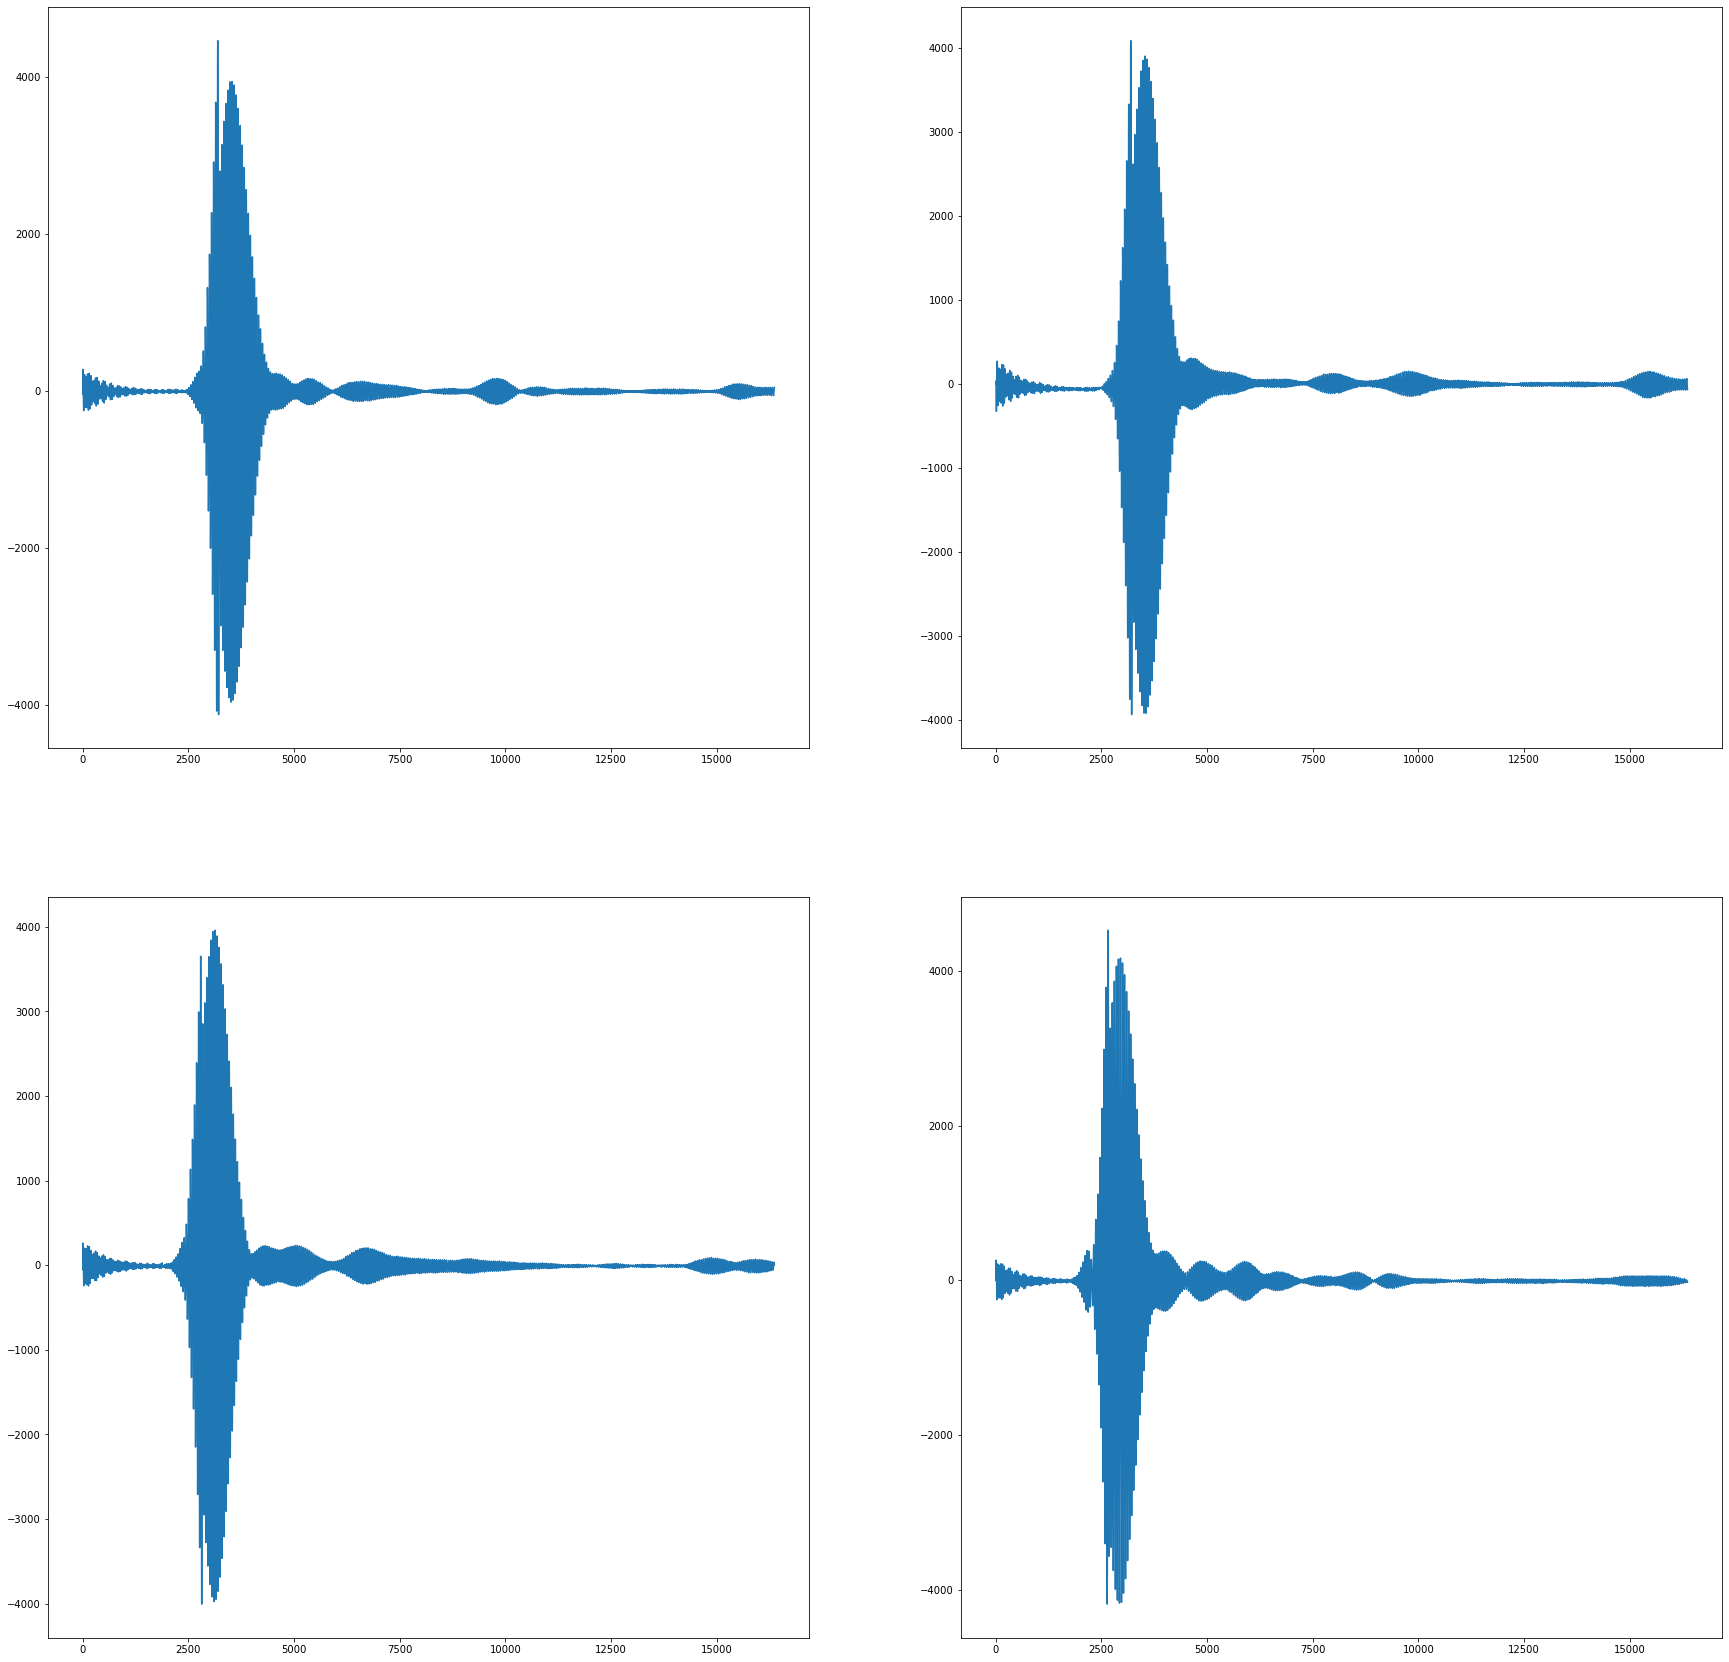

In [98]:
y = df.iloc[0]
y1 = df.iloc[2]
y2 = df.iloc[40]
y3 = df.iloc[45]
y4 = df.iloc[25]
y5 = df.iloc[20]
y6 = df.iloc[35]
y7 = df.iloc[31]
y8 = df.iloc[14]

x = np.arange(16367)
plt.figure(figsize=(30,30))
plt.subplot(2,2,1) 
plt.plot(x, y)
plt.subplot(2,2,2)
plt.plot(x, y1)
plt.subplot(2,2,3)
plt.plot(x, y2)
plt.subplot(2,2,4)
plt.plot(x, y3)


In [99]:
print(df.loc[14, ['col1000','col1001','col1002','col1003','col1004','col1005','col1006','col1007','col1008','col1009','col1010','col1011','col1012','col1013', 'col1100', 'col1026', 'col1032']])

col1000    18.0
col1001    21.0
col1002    28.0
col1003    32.0
col1004    35.0
col1005    33.0
col1006    30.0
col1007    27.0
col1008    22.0
col1009    13.0
col1010     8.0
col1011     1.0
col1012    -5.0
col1013    -8.0
col1100   -59.0
col1026   -49.0
col1032    -6.0
Name: 14, dtype: float64


In [76]:
import numpy as np
def despike(yi, th=1.e-8):
    '''Remove spike from array yi, the spike area is where the difference between
    the neigboring points is higher than th.'''
    y = np.copy(yi) 
    n = len(y)
    x = np.arange(n)
    c = np.argmax(y)
    d = abs(np.diff(y))
    try:
        l = c - 1 - np.where(d[c-1::-1]<th)[0][0]
        r = c + np.where(d[c:]<th)[0][0] + 1
    except: # no spike, return unaltered array
        return y
    # for fit, use area twice wider then the spike
    if (r-l) <= 3:
        l -= 1
        r += 1
    s = int(round((r-l)/2.))
    lx = l - s
    rx = r + s
    # make a gap at spike area
    xgapped = np.concatenate((x[lx:l],x[r:rx]))
    ygapped = np.concatenate((y[lx:l],y[r:rx]))
    # quadratic fit of the gapped array
    z = np.polyfit(xgapped,ygapped,2)
    p = np.poly1d(z)
    y[l:r] = p(x[l:r])
    return y

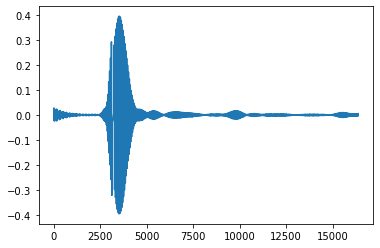

In [100]:
yd = despike(y, th=20)
yd = yd / 10000

plt.plot(x, yd)

In [78]:
# Distance away from the FBEWMA that data should be removed.
DELTA = 0.1

# clip data above this value:
HIGH_CLIP = 2.1

# clip data below this value:
LOW_CLIP = -2.1

# random values above this trigger a spike:
RAND_HIGH = 0.98

# random values below this trigger a negative spike:
RAND_LOW = 0.02

# How many samples to run the FBEWMA over.
SPAN = 10

# spike amplitude
SPIKE = 2

def clip_data(unclipped, high_clip, low_clip):
    ''' Clip unclipped between high_clip and low_clip. 
    unclipped contains a single column of unclipped data.'''
    
    # convert to np.array to access the np.where method
    np_unclipped = np.array(unclipped)
    # clip data above HIGH_CLIP or below LOW_CLIP
    cond_high_clip = (np_unclipped > HIGH_CLIP) | (np_unclipped < LOW_CLIP)
    np_clipped = np.where(cond_high_clip, np.nan, np_unclipped)
    return np_clipped.tolist()
def ewma_fb(df_column, span):
    ''' Apply forwards, backwards exponential weighted moving average (EWMA) to df_column. '''
    # Forwards EWMA.
    fwd = pd.Series.ewm(df_column, span=span).mean()
    # Backwards EWMA.
    bwd = pd.Series.ewm(df_column[::-1],span=10).mean()
    # Add and take the mean of the forwards and backwards EWMA.
    stacked_ewma = np.vstack(( fwd, bwd[::-1] ))
    fb_ewma = np.mean(stacked_ewma, axis=0)
    return fb_ewma
def remove_outliers(spikey, fbewma, delta):
    ''' Remove data from df_spikey that is > delta from fbewma. '''
    np_spikey = np.array(spikey)
    np_fbewma = np.array(fbewma)
    cond_delta = (np.abs(np_spikey-np_fbewma) > delta)
    np_remove_outliers = np.where(cond_delta, np.nan, np_spikey)
    return np_remove_outliers


In [10]:
arr2= np.array([-0.2,0.15,0.35,0.12,0.65,-0.55,-0.9,-0.2,0.32,0.45,0.22,0.87,0.55,0.44,0.11,0.75,0.32,0.25,0.11,0.33,0.77,
               0.66,0.88,0.25,0.75,0.58,0.64,0.66,0.12,0.32,0.45])
arr = arr2[arr2 >= 0]
sortedIndexes = np.argsort(arr)
sortedArray = arr[sortedIndexes]
highestValues = sortedArray[-5 : ]
average = np.average(highestValues)
print(arr)
print(highestValues)
print(average)

[0.15 0.35 0.12 0.65 0.32 0.45 0.22 0.87 0.55 0.44 0.11 0.75 0.32 0.25
 0.11 0.33 0.77 0.66 0.88 0.25 0.75 0.58 0.64 0.66 0.12 0.32 0.45]
[0.75 0.75 0.77 0.87 0.88]
0.804


In [11]:
class SignalManipulation():
    def __init__(self, array, numberofPeakstoConsider, noiseAmplitude):
        '''
        Initiate this class with an array which is a row of data or in our case a full signal
        '''
        self.data = array
        self.numberOfHighestPeaks = numberofPeakstoConsider
        self.noiseAmp = noiseAmplitude
        
    def find_threshold(self):
        arr1 = self.data
        arr = arr1[arr1 >= 0]
        sortedIndexes = np.argsort(arr)
        sortedArray = arr[sortedIndexes]
        highestValues = sortedArray[-self.numberOfHighestPeaks : ]
        average = np.average(highestValues)
        return average
    
    def find_lag(self):
        arr = np.where(self.data >= self.noiseAmp, 1, 0)
        # Create an array that is 1 where a is 0, and pad each end with an extra 0.
        iszero = np.concatenate(([0], np.equal(arr, 0).view(np.int8), [0]))
        absdiff = np.abs(np.diff(iszero))
        # Runs start and end where absdiff is 1.
        ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
        return ranges[0,1] - 1 

In [12]:
sm = SignalManipulation(y, 3, 0.15)
a = sm.find_threshold
b = sm.find_lag()
print(a)
print(b)

<bound method SignalManipulation.find_threshold of <__main__.SignalManipulation object at 0x000001E1BF120D30>>
662


In [13]:
z = np.copy(y)
y = np.where( (y >= 0.1) & (y <= 0.2), 0.001, y)
y = np.where( (y > 0.2) & (y <= 0.3), 0.005, y)
y = np.where( (y > 0.3) & (y <= 0.31), 1, y)
y = np.where( (y > 0.31) & (y <= 0.32), 10, y)
y = np.where( (y > 0.32) & (y <= 0.321), 100, y)
y = np.where( (y > 0.321) & (y <= 0.322), 1000, y)
y = np.where( (y > 0.322) & (y <= 0.323), 10000, y)
y = np.where( (y > 0.323) & (y <= 0.324), 100000, y)
y = np.where( (y > 0.324) & (y <= 0.325), 1000000, y)
y = np.where( (y > 0.325) & (y <= 0.326), 10000000, y)
y = np.where( (y> 0.326), 100000000, y) 

In [93]:
z = np.copy(y)
yd = np.where( (yd >= 0.1) & (yd <= 0.2), 0.001, yd)
yd = np.where( (yd > 0.2) & (yd <= 0.3), 0.005, yd)
yd = np.where( (yd > 0.3) & (yd <= 0.31), 1, yd)
yd = np.where( (yd > 0.31) & (yd <= 0.32), 10, yd)
yd = np.where( (yd > 0.32) & (yd <= 0.321), 100, yd)
yd = np.where( (yd > 0.321) & (yd <= 0.322), 1000, yd)
yd = np.where( (yd > 0.322) & (yd <= 0.323), 10000, yd)
yd = np.where( (yd > 0.323) & (yd <= 0.324), 100000, yd)
yd = np.where( (yd > 0.324) & (yd <= 0.325), 1000000, yd)
yd = np.where( (yd > 0.325) & (yd <= 0.326), 10000000, yd)
yd = np.where( (yd> 0.326), 100000000, yd) 

In [58]:
thresholdValues = {'1': 25, '2': 25, '3': 25, '4': 25, '5': 25, '6': 25, '7': 25, '8': 25, '9': 25, '10': 25, 
                   '11': 25, '12': 25, '13': 25, '14': 25, '15': 25, '16': 25, '17': 25, '18': 25, '19': 25, '20': 25,
                   '21': 25, '22': 25, '23': 25, '24': 25, '25': 25, '26': 25, '27': 25, '28': 25, '29': 25, '30': 25,
                   '31': 25, '32': 25, '33': 25, '34': 22, '35': 25, '36': 25, '37': 25, '38': 25, '39': 25, '40': 25,
                   '41': 25, '42': 25, '43': 25, '44': 25, '45': 25, '46': 25, '47': 25, '48': 25, '49': 25, '50': 25}

print(thresholdValues[str(34)])
print(type (thresholdValues[str(34)]))

22
<class 'int'>


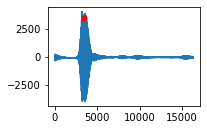

In [94]:
lag = 662
threshold = 25
influence = 0.1
result = thresholding_algo(yd, lag=lag, threshold=thresholdValues[str(1)], influence=influence)
startingPoint = result["unitLagPositions"][0][0]
endingPoint = result["unitLagPositions"][0][-1]
unitPositionValues = np.take(z, result["unitLagPositions"])
#print(result["unitLagPositions"])
#print(startingPoint)
#print(endingPoint)
#print(unitPositionValues[0])
#print(find_highest_value(unitPositionValues[0], 1)[0])
# Plot result
#plt.subplot(221)
#plt.plot(np.arange(0, len(yd)), yd)

#plt.plot(np.arange(0, len(yd)), result["avgFilter"], color="cyan", lw=2)



#plt.plot(np.arange(0, len(yd)), result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

#plt.plot(np.arange(0, len(yd)), result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

#plt.subplot(222)
#plt.step(np.arange(0, len(yd)), result["signals"], color="red", lw=2)

peak = find_highest_value(unitPositionValues[0], 1)
peakPoint = np.where(z == peak[0])[0][0]
plt.subplot(223)
plt.plot(np.arange(0, len(y)), y)
plt.plot(peakPoint, peak[0], marker= "o", markersize= 5, markeredgecolor= "red", markerfacecolor= "red")
